In [1]:
import numpy as np
from scipy.interpolate import interp1d as interp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from thunderflask import thunderflask
from bacteria import strain
from ffgen import ffgen
from codonTable import codonTable
from codonUtils import utils
from bacteria import strain
from ffgen import ffgen
import pickle
from codonOptimizer import tableOptimizer
from queue import Queue as queue
from random import choice
from matplotlib.colors import LinearSegmentedColormap as LSC
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cProfile


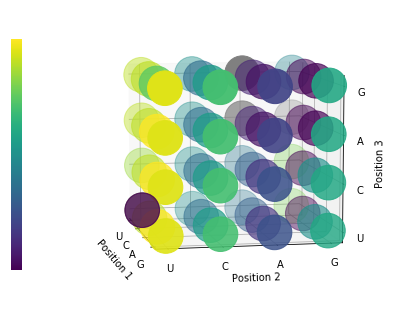

Iteration Number: 100%|██████████| 5000/5000 [01:56<00:00, 42.78it/s]


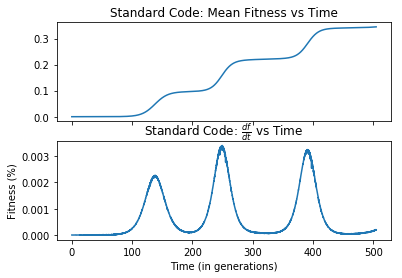

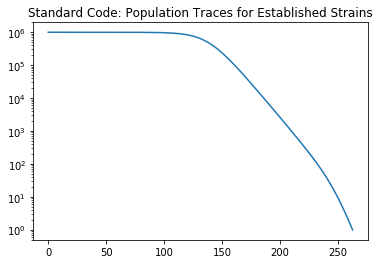

In [2]:
table = codonTable()
table.plot3d()
# populate sim
LUCA = strain(N_pop=1e6, table = table, fitness=0, mu=2e-5)
sim = thunderflask(LUCA)
# initialize some variables
T_curr = 0
mut_param = [1, 2]
dt = 0.1

#profile sim
#cProfile.run('reductionistSim.simulate(300, dt, T_curr, mut_param, save_all=True, prune_strains=False)')

# run simulation
sim.simulate(500, dt, T_curr, mut_param)
t = np.array(sim.f_avgtrace['timepoints'])
f = np.array(sim.f_avgtrace['f_avg'])
fig, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(t, f)
axarr[0].set_title('Standard Code: Mean Fitness vs Time')
dt = np.diff(t)
t_avg = (t[1:]+t[:-1])/2
gradf = np.diff(f)/dt
axarr[1].plot(t_avg, gradf)
axarr[1].set_title(r'Standard Code: $\frac{df}{dt}$ vs Time')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness (%)')
plt.show()

for i, bact in enumerate(sim.estStrains):
    # if i % 10 == 0:
    t = bact.timepoints
    pop = bact.poptrace
    plt.semilogy(t, pop)
plt.title('Standard Code: Population Traces for Established Strains')
plt.show()

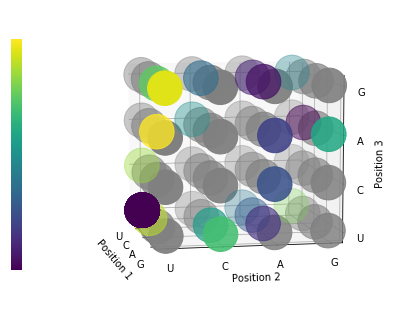

Iteration Number: 100%|██████████| 5000/5000 [02:11<00:00, 38.12it/s]


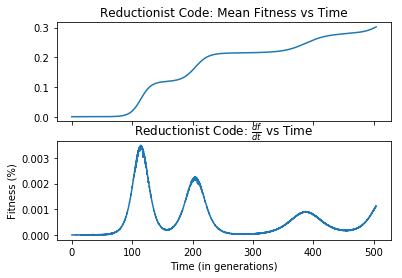

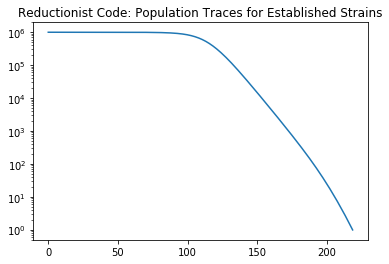

In [3]:
newTable = table.codonDict
newTable['UUU'] = '*'
newTable['UUA'] = '*'
newTable['UUG'] = '*'
newTable['UCU'] = '*'
newTable['UCC'] = '*'
newTable['UCG'] = '*'
newTable['UAC'] = '*'
newTable['UGC'] = '*'
newTable['CUA'] = '*'
newTable['CUC'] = '*'
newTable['CUG'] = '*'
newTable['CCU'] = '*'
newTable['CCC'] = '*'
newTable['CCA'] = '*'
newTable['CAA'] = '*'
newTable['CAC'] = '*'
newTable['CGC'] = '*'
newTable['CGU'] = '*'
newTable['CGG'] = '*'
newTable['AUU'] = '*'
newTable['AUC'] = '*'
newTable['ACC'] = '*'
newTable['ACG'] = '*'
newTable['ACA'] = '*'
newTable['AAC'] = '*'
newTable['AAA'] = '*'
newTable['AGA'] = '*'
newTable['AGG'] = '*'
newTable['AGC'] = '*'
newTable['AGU'] = '*'
newTable['GUC'] = '*'
newTable['GUA'] = '*'
newTable['GUU'] = '*'
newTable['GCC'] = '*'
newTable['GCG'] = '*'
newTable['GCA'] = '*'
newTable['GAU'] = '*'
newTable['GAG'] = '*'
newTable['GGG'] = '*'
newTable['GGU'] = '*'
newTable['GGC'] = '*'
tableObj = codonTable(newTable)
#table.dictToGraph()
#utils.getAAcounts(newTable)
#utils.getCodonConnectivity(newTable)
#utils.getResiConnectivity(newTable)
table.plot3d()
# populate sim
LUCA = strain(N_pop=1e6, table=tableObj, fitness=0, mu=2e-5)
sim = thunderflask(LUCA)
# initialize some variables
T_curr = 0
mut_param = [1, 2]
dt = 0.1

#profile sim
#cProfile.run('reductionistSim.simulate(300, dt, T_curr, mut_param, save_all=True, prune_strains=False)')

# run simulation
sim.simulate(500, dt, T_curr, mut_param)
t = np.array(sim.f_avgtrace['timepoints'])
f = np.array(sim.f_avgtrace['f_avg'])
fig, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(t, f)
axarr[0].set_title('Reductionist Code: Mean Fitness vs Time')
dt = np.diff(t)
t_avg = (t[1:]+t[:-1])/2
gradf = np.diff(f)/dt
axarr[1].plot(t_avg, gradf)
axarr[1].set_title(r'Reductionist Code: $\frac{df}{dt}$ vs Time')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness (%)')
plt.show()

for i, bact in enumerate(sim.estStrains):
    # if i % 10 == 0:
    t = bact.timepoints
    pop = bact.poptrace
    plt.semilogy(t, pop)
plt.title('Reductionist Code: Population Traces for Established Strains')
plt.show()

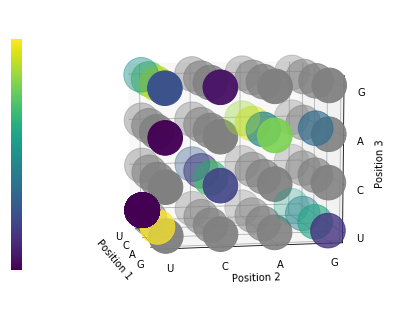

Iteration Number: 100%|██████████| 5000/5000 [04:21<00:00, 19.15it/s]


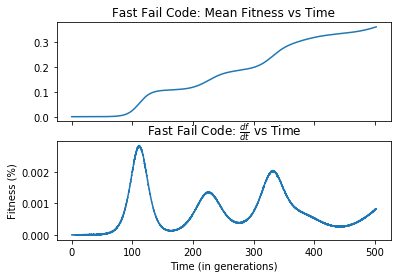

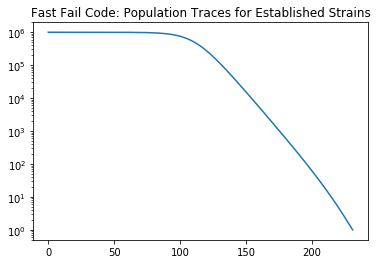

In [4]:
failTable = codonTable(table=ffgen.triplet())
failTable.plot3d()
# populate sim
LUCA = strain(N_pop=1e6, table = failTable, fitness=0, mu=2e-5)
sim = thunderflask(LUCA)
# initialize some variables
T_curr = 0
mut_param = [1,2]
dt = 0.1

#profile sim
#cProfile.run('reductionistSim.simulate(300, dt, T_curr, mut_param, save_all=True, prune_strains=False)')

# run simulation
sim.simulate(500, dt, T_curr, mut_param)
t = np.array(sim.f_avgtrace['timepoints'])
f = np.array(sim.f_avgtrace['f_avg'])
fig, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(t, f)
axarr[0].set_title('Fast Fail Code: Mean Fitness vs Time')
dt = np.diff(t)
t_avg = (t[1:]+t[:-1])/2
gradf = np.diff(f)/dt
axarr[1].plot(t_avg, gradf)
axarr[1].set_title(r'Fast Fail Code: $\frac{df}{dt}$ vs Time')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness (%)')
plt.show()

for i, bact in enumerate(sim.estStrains):
    # if i % 10 == 0:
    t = bact.timepoints
    pop = bact.poptrace
    plt.semilogy(t, pop)
plt.title('Fast Fail Code: Population Traces for Established Strains')
plt.show()

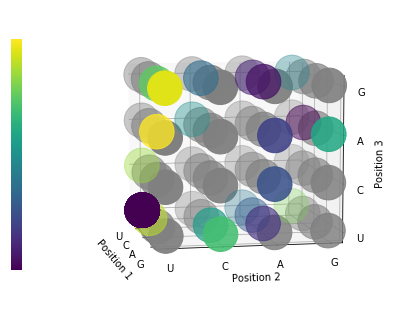

Iteration Number:   8%|▊         | 833/10050 [00:13<02:28, 62.23it/s]


Iteration Number:  12%|█▏        | 1214/10050 [00:27<03:20, 44.06it/s]


Iteration Number:  20%|█▉        | 1965/10050 [00:41<02:52, 46.86it/s]


Iteration Number:  22%|██▏       | 2204/10050 [00:52<03:06, 41.97it/s]


KeyboardInterrupt: 

Iteration Number:  22%|██▏       | 2204/10050 [01:10<04:09, 31.47it/s]

In [5]:
table = codonTable()
table.plot3d()
# populate sim
LUCA = strain(N_pop=1e6, table = table, fitness=0, mu=2e-5)
sim = thunderflask(LUCA)
# initialize some variables
T_curr = 0
mut_param = [1,2]
dt = 0.1
N_sims = 10
T_sim = 1000
t_extra = 5
date = '2-22'
code = 'Standard Code'
filepath = 'res/2-22 Traces'
filename = '{0}_{1}_favg_traces_T={2}_N={3}_b={4}_l={5}.pickle'.format(date,
                                                                       code,
                                                                       T_sim,
                                                                       N_sims,
                                                                      mut_param[0],
                                                                      mut_param[1]) 
# initialize list of dictionaries of arrays (i know, it's too much) 
dataframes = []
newtimes = np.linspace(0, T_sim, int((T_sim)/dt))
# run N simulations
for i in tqdm(range(N_sims), desc='Simulation Number: '):
    LUCA = strain(N_pop=1e6, table=tableObj, fitness=0, mu=2e-5)
    sim = thunderflask(LUCA)
    sim.simulate(T_sim+t_extra, dt, T_curr, mut_param)
    t = sim.f_avgtrace['timepoints']
    f_avg = sim.f_avgtrace['f_avg']
    interp_fxn = interp(t, f_avg)
    newf = interp_fxn(newtimes)
    df = pd.DataFrame({
        'time' : newtimes, 
        'value' : newf, 
        'sim' : [i for j in range(len(newf))],
        'code' : [code for j in range(len(newf))]
    })
    dataframes.append(df)
# package data into pandas dataframe
df_sc = pd.concat(dataframes)
# pickle results
with open('{0}/{1}'.format(filepath, filename), 'wb') as handle:
    pickle.dump(df_sc, handle)
# plot results
ax = sns.tsplot(data=df_sc, time='time', value='value', unit='sim')
plt.title('{0}: <F> vs time ({1} Replicates)'.format(code, N_sims))
plt.xlabel('Time (in generations)')
plt.ylabel('Mean Fitness')
plt.show()
print('done')

In [ ]:
table = codonTable()
newTable = table.codonDict
newTable['UUU'] = '*'
newTable['UUA'] = '*'
newTable['UUG'] = '*'
newTable['UCU'] = '*'
newTable['UCC'] = '*'
newTable['UCG'] = '*'
newTable['UAC'] = '*'
newTable['UGC'] = '*'
newTable['CUA'] = '*'
newTable['CUC'] = '*'
newTable['CUG'] = '*'
newTable['CCU'] = '*'
newTable['CCC'] = '*'
newTable['CCA'] = '*'
newTable['CAA'] = '*'
newTable['CAC'] = '*'
newTable['CGC'] = '*'
newTable['CGU'] = '*'
newTable['CGG'] = '*'
newTable['AUU'] = '*'
newTable['AUC'] = '*'
newTable['ACC'] = '*'
newTable['ACG'] = '*'
newTable['ACA'] = '*'
newTable['AAC'] = '*'
newTable['AAA'] = '*'
newTable['AGA'] = '*'
newTable['AGG'] = '*'
newTable['AGC'] = '*'
newTable['AGU'] = '*'
newTable['GUC'] = '*'
newTable['GUA'] = '*'
newTable['GUU'] = '*'
newTable['GCC'] = '*'
newTable['GCG'] = '*'
newTable['GCA'] = '*'
newTable['GAU'] = '*'
newTable['GAG'] = '*'
newTable['GGG'] = '*'
newTable['GGU'] = '*'
newTable['GGC'] = '*'
tableObj = codonTable(newTable)
table.plot3d()
# initialize some variables
T_curr = 0
mut_param = [1,2]
dt = 0.1
N_sims = 10
T_sim = 1000
t_extra = 5
date = '2-22'
code = 'Reductionist Code'
filepath = 'res/2-22 Traces'
filename = '{0}_{1}_favg_traces_T={2}_N={3}_b={4}_l={5}.pickle'.format(date,
                                                                       code,
                                                                       T_sim,
                                                                       N_sims,
                                                                      mut_param[0],
                                                                      mut_param[1]) 
# initialize list of dictionaries of arrays (i know, it's too much) 
dataframes = []
newtimes = np.linspace(0, T_sim, int((T_sim)/dt))
# run N simulations
for i in tqdm(range(N_sims), desc='Simulation Number: '):
    LUCA = strain(N_pop=1e6, table=tableObj, fitness=0, mu=2e-5)
    sim = thunderflask(LUCA)
    sim.simulate(T_sim+t_extra, dt, T_curr, mut_param)
    t = sim.f_avgtrace['timepoints']
    f_avg = sim.f_avgtrace['f_avg']
    interp_fxn = interp(t, f_avg)
    newf = interp_fxn(newtimes)
    df = pd.DataFrame({
        'time' : newtimes, 
        'value' : newf, 
        'sim' : [i for j in range(len(newf))],
        'code' : [code for j in range(len(newf))]
    })
    dataframes.append(df)
# package data into pandas dataframe
df_sc = pd.concat(dataframes)
# pickle results
with open('{0}/{1}'.format(filepath, filename), 'wb') as handle:
    pickle.dump(df_sc, handle)
# plot results
ax = sns.tsplot(data=df_sc, time='time', value='value', unit='sim')
plt.title('{0}: <F> vs time ({1} Replicates)'.format(code, N_sims))
plt.xlabel('Time (in generations)')
plt.ylabel('Mean Fitness')
plt.show()
print('done')

In [ ]:
failTable = codonTable(table=ffgen.triplet())
failTable.plot3d()
# initialize some variables
T_curr = 0
mut_param = [1,2]
dt = 0.1
N_sims = 10
T_sim = 1000
t_extra = 5
date = '2-22'
code = 'Fast Fail Code'
filepath = 'res/2-22 Traces'
filename = '{0}_{1}_favg_traces_T={2}_N={3}_b={4}_l={5}.pickle'.format(date,
                                                                       code,
                                                                       T_sim,
                                                                       N_sims,
                                                                      mut_param[0],
                                                                      mut_param[1]) 
# initialize list of dictionaries of arrays (i know, it's too much) 
dataframes = []
newtimes = np.linspace(0, T_sim, int((T_sim)/dt))
# run N simulations
for i in tqdm(range(N_sims), desc='Simulation Number: '):
    LUCA = strain(N_pop=1e6, table=tableObj, fitness=0, mu=2e-5)
    sim = thunderflask(LUCA)
    sim.simulate(T_sim+t_extra, dt, T_curr, mut_param)
    t = sim.f_avgtrace['timepoints']
    f_avg = sim.f_avgtrace['f_avg']
    interp_fxn = interp(t, f_avg)
    newf = interp_fxn(newtimes)
    df = pd.DataFrame({
        'time' : newtimes, 
        'value' : newf, 
        'sim' : [i for j in range(len(newf))],
        'code' : [code for j in range(len(newf))]
    })
    dataframes.append(df)
# package data into pandas dataframe
df_sc = pd.concat(dataframes)
# pickle results
with open('{0}/{1}'.format(filepath, filename), 'wb') as handle:
    pickle.dump(df_sc, handle)
# plot results
ax = sns.tsplot(data=df_sc, time='time', value='value', unit='sim')
plt.title('{0}: <F> vs time ({1} Replicates)'.format(code, N_sims))
plt.xlabel('Time (in generations)')
plt.ylabel('Mean Fitness')
plt.show()
print('done')

In [ ]:
with open('res/2-22 Traces/2-22_Standard Code_favg_traces_T=1000_N=10_b=1_l=2.pickle', 'rb') as handle:
    standard_df = pickle.load(handle)
    
with open('res/2-22 Traces/2-22_Fast Fail_favg_traces_T=1000_N=10_b=1_l=2.pickle', 'rb') as handle:
    fastfail_df = pickle.load(handle)
    
with open('res/2-22 Traces/2-22_Reductionist Code_favg_traces_T=1000_N=10_b=1_l=2.pickle', 'rb') as handle:
    reductionist_df = pickle.load(handle)

In [ ]:
ax1 = sns.tsplot(data=standard_df, time='time', value='value', unit='sim', condition='code', color='red')
ax2 = sns.tsplot(data=fastfail_df, time='time', value='value', unit='sim', condition='code', color='blue')
ax3 = sns.tsplot(data=reductionist_df, time='time', value='value', unit='sim', condition='code', color='green')
plt.legend()
plt.title('Mean Fitness vs Time (10 Simulations)')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness')
plt.savefig('res/2-22_F_avg_T=1000_b=2_l=3-5.pdf', bbox_inches='tight')
plt.show()